In [17]:
import numpy as np
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy.interpolate import make_interp_spline
from scipy.interpolate import splprep, splev
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
mu_0 = 4 * np.pi * 1e-7  # Vakuumpermeabilität [Vs/(Am)]

dB/dx = (-4.03+/-0.13)e+01 T/m
R² = 0.9951
χ (Graphit) = (-6.69+/-1.83)e-04


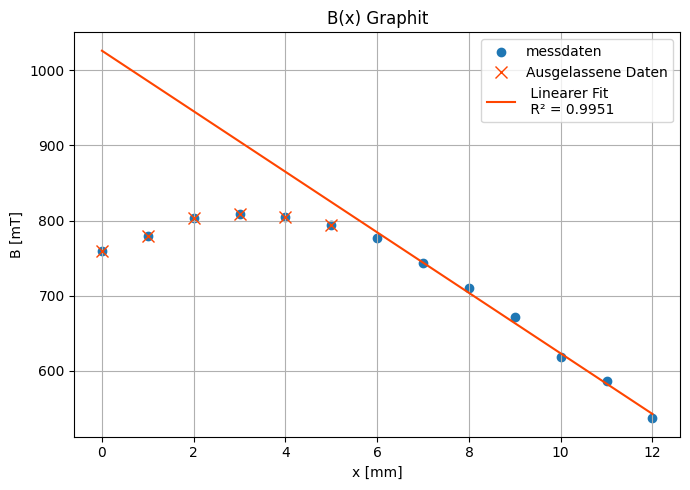

In [81]:
#2 Graphit suszebilität

# CSV-Datei mit graphit mit I=10A
df_faraday = pd.read_csv("graphit.csv")

x = df_faraday['x'].values  # [m]
Hu = unp.uarray(df_faraday['B'].values, 1)  # [T]
H_std = unp.std_devs(Hu)

H = df_faraday['B'].values
# Kraftmessung & Volumen
F_x = ufloat(0.22,0.05) # in [N], unischerheit muss noch
V = ufloat(0.135, 0.02)*1e-7 #ml --> m^3

# Regression über die letzten 6
x_fit = x[6:]
H_fit = H[6:]

slope, intercept, r, _, stderr = linregress(x_fit, H_fit)
dB_dx = ufloat(slope, stderr)


print(f"dB/dx = {dB_dx:.2e} T/m")


#χ für Graphit berechnen

B_x = ufloat(760, 10)  #Flussdichte im Probenmittelpunkt

chi = (mu_0 * F_x) / (V * B_x * dB_dx)

print(f"R² = {r**2:.4f}")
print(f"χ (Graphit) = {chi:.2e}")

#Plot B(x) Graphit
plt.figure(figsize=(7, 5))
plt.scatter(x, H , label="messdaten")
plt.plot(x[:6], H[:6], 'x', label="Ausgelassene Daten", color = 'orangered', markersize=8, zorder=10) 
plt.plot(x, slope * x + intercept, label=f" Linearer Fit\n R² = {r**2:.4f}", color = 'orangered')
plt.xlabel("x [mm]")
plt.ylabel("B [mT]")
plt.title("B(x) Graphit")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Graphitplot.pdf")
plt.show()




In [19]:
# # Titan Suszibilität

# # CSV-Datei Titan
# df_gouy = pd.read_csv("titan_gouy.csv")

# H = df_gouy['B'].values   # T
# F = -0.22 #mN
# B_quadrat = H**2

# # Titan-Querschnitt
# d = ufloat(5e-3,0.05)  # m
# A = ufloat(3e-3, 0.05)

# #Regression F vs. B² und χ Berechnung

# Steigung, intercept, r, p, stderr = linregress(B_quadrat, F)
# Steigung_u = ufloat(Steigung, stderr)

# chi_ti = 2 * mu_0 * Steigung_u / A

# print(f"χ (Titan) = {chi_ti:.2e}")

# #Plot F(B²) Titan
# plt.figure(figsize=(7, 5))
# plt.scatter(B_quadrat, F, label="Messdaten")
# plt.plot(B_quadrat, slope_ti * B_quadrat + intercept, label="Regression")
# plt.xlabel(r"$B^2$ [T$^2$]")
# plt.ylabel(r"$F$ [N]")
# plt.title("F(B²) Titan")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()


A = 29.03334+/-0.19101
χ = (1.63+/-0.12)e-04

R² = 0.98053


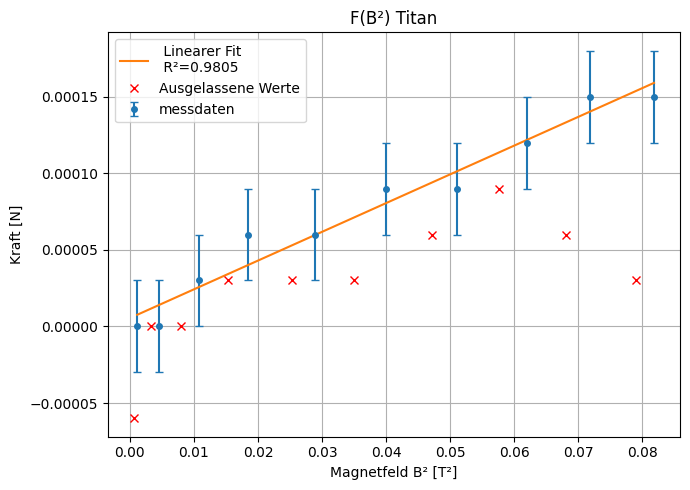

In [72]:
Titan_werte = pd.read_csv("titan_gouy.csv")  # 2 Spalten H [A/m], B [T]
Titan = Titan_werte.iloc[1::2]#.iloc[1:]            #ersten wert auslassen, weil negativ --> ausreißer

Magnetfeld = ((Titan["B"].values)*1e-3)**2 #mT --> T
Kraft = Titan["F"].values*1e-3  #mN --> N
Gerade,Intercept,r,_,stderr=linregress(Magnetfeld,Kraft)

d = ufloat(6.08,0.02)*1e-3  #mm in m 
A = np.pi*((d/2)**2) 

Titan_kackwerte = Titan_werte.iloc[0::2]
Magnetfeld_kaka = ((Titan_kackwerte["B"].values)*1e-3)**2
Kraft_kaka = Titan_kackwerte["F"].values*1e-3

Steigung = ufloat(Gerade, stderr)
chi = (2 * mu_0 * Steigung) / A

#print(f"Steigung={Steigung:.2e} \n")
print(f"A = {A*1e6:.5f}")
print(f"χ = {chi:.2e}\n")
print(f"R² = {r:.5f}")

plt.figure(figsize=(7, 5))
plt.errorbar(Magnetfeld, Kraft, fmt='o',yerr=0.00003, capsize=3, markersize=4, label="messdaten")
plt.plot(Magnetfeld, Gerade*Magnetfeld+Intercept,markersize=4,label=f" Linearer Fit \n R²={r:.4f}")
plt.plot(Magnetfeld_kaka, Kraft_kaka, 'rx', label="Ausgelassene Werte")
plt.title("F(B²) Titan")
plt.ylabel("Kraft [N]")
plt.xlabel("Magnetfeld B² [T²]")
plt.grid()
plt.legend()
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.2f}"))
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Titanplot.pdf")
plt.show()


Br = 0.583+/-0.017 T
Hc = 656.1+/-19.7 A/m
Bs = 1.024+/-0.031 T
Hs = 2446.9+/-73.4 A/m


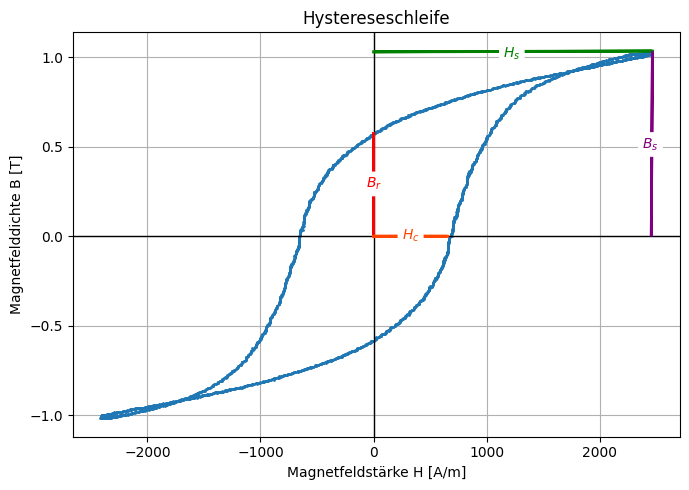

In [47]:
# CSV-Datei Hysteresedaten
df_hyst = pd.read_csv("hysteresekurve.CSV")  # 2 Spalten H [A/m], B [T]
#print(df_hyst.head())

B_y_wert = df_hyst["Uy"].values*1e-1
H_x_wert = df_hyst["Ux"].values*1e-1
Bu_y = unp.uarray(B_y_wert, 0.03 * abs(B_y_wert))
Hu_x = unp.uarray(H_x_wert , 0.03 * abs(H_x_wert))
B_y = unp.nominal_values(Bu_y)
H_x = unp.nominal_values(Hu_x)

R = 70.7*1e3     # Widerstand vom Integrationsglied 70.7kΩ
C = 10.6*1e-6    # Kapazität vom Integrationsglied 10.6μF
n_2 = 788        # Windungszahl sekundärspule 
A = 2.02*1e-4    # Querschnittsfläche Kern 2.02cm^2

n_1 = 197        # Windungsanzahl Primärspule
L = 20*1e-3      # Länge Primärspule 20mm
R_v = 46.4       # Vorwiderstand 46.4Ω

Hu = (n_1/L)*(Hu_x/R_v)
Bu = ((R*C)/(n_2*A))*Bu_y

H = (n_1/L)*(H_x/R_v)
B = ((R*C)/(n_2*A))*B_y


# Remanenz: B bei H ≈ 0
idx_H0 = np.argmin(np.abs(Hu))
Bur = abs(Bu[idx_H0])

# Koerzitivfeldstärke: H bei B ≈ 0
idx_B0 = np.argmin(np.abs(Bu))
Huc = abs(Hu[idx_B0])

# Sättigung: Maximum von +B
idx_Bs = np.argmax(np.abs(Bu))
Bus = Bu[idx_Bs]

idx_Hs = np.argmax(np.abs(Hu))
Hus = abs(Hu[idx_Hs])

print(f"Br = {Bur:.3f} T")
print(f"Hc = {Huc:.1f} A/m")
print(f"Bs = {Bus:.3f} T")
print(f"Hs = {Hus:.1f} A/m")

Bs = unp.nominal_values(Bus)
Hs = unp.nominal_values(Hus)
Br = unp.nominal_values(Bur)
Hc = unp.nominal_values(Huc)

# Plot Hystereseschleife B(H)
plt.figure(figsize=(7, 5))
plt.arrow(0, Bs+0.005, Hs+20, 0.005, color='green',zorder=10, linewidth=2)
plt.arrow(Hs+10, 0, 10, Bs+0.005, color='purple',zorder=10, linewidth=2)
plt.arrow(0, 0, 0, Br-0.01, color='red',zorder=10, linewidth=2)
plt.arrow(0, 0, Hc, 0, color='orangered',zorder=10, linewidth=2)

plt.text(Hs/2, Bs -0.05, r"$H_s$", color='green', ha='center', va='bottom', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)
plt.text(Hs - 70, Bs/2, r"$B_s$", color='purple', ha='left', va='center', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)
plt.text(-70, Br/2, r"$B_r$", color='red', ha='left', va='center', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)  # small offset for visibility
plt.text(Hc/2, 0.05, r"$H_c$", color='orangered', ha='center', va='top', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)

plt.plot(H,B, 'o', markersize=1)
plt.title("Hystereseschleife")
plt.ylabel("Magnetfelddichte B [T]")
plt.xlabel("Magnetfeldstärke H [A/m]")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)


plt.grid()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Hystereschleife.pdf")
plt.show() 


B_s_abgelesen= 0.94+/-0.03
H_s_abgelesen= 2048.55+/-61.46
B_r_abgelesen= 0.56+/-0.02
H_c_abgelesen= 692.05+/-20.76

Permeabilität μ(H)-max = 0.000902+/-0.000000
Permeabilität μ_r-max = 783.82+/-100.32
Suszeptibilität χ = 782.82+/-100.32

R² = 0.9955


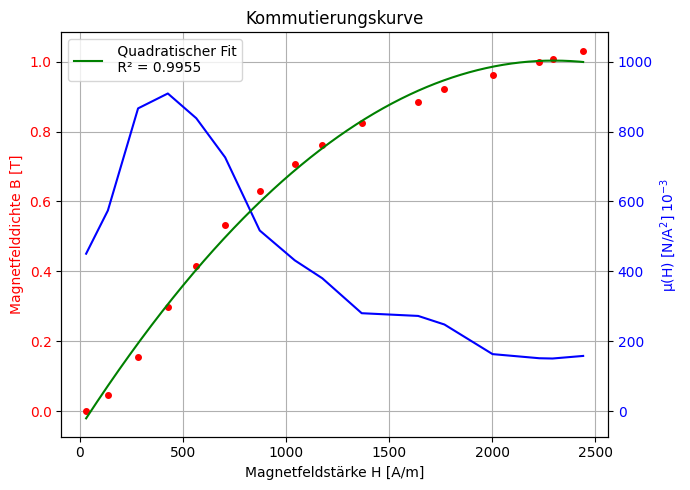

In [39]:
# Plot Kommutierungskurve

df_hyst = pd.read_csv("Kommutierungskurve.CSV")  # 2 Spalten H [A/m], B [T]
B_y_wert = df_hyst["Uy_V"].values*1e-1
H_x_wert = df_hyst["Ux_V"].values*1e-1
Bu_y = unp.uarray(B_y_wert, 0.03 * B_y_wert)
Hu_x = unp.uarray(H_x_wert , 0.03 * H_x_wert)
B_y = unp.nominal_values(Bu_y)
H_x = unp.nominal_values(Hu_x)

R = 70.7*1e3     # Widerstand vom Integrationsglied 70.7kΩ
C = 10.6*1e-6    # Kapazität vom Integrationsglied 10.6μF
n_2 = 788        # Windungszahl sekundärspule 
A = 2.02*1e-4    # Querschnittsfläche Kern 2.02cm^2

n_1 = 197        # Windungsanzahl Primärspule
L = 20*1e-3      # Länge Primärspule 20mm
R_v = 46.4       # Vorwiderstand 46.4Ω

H = (n_1/L)*(H_x/R_v)
B = ((R*C)/(n_2*A))*B_y

#abgelesene werte

H_s = (n_1/L)*(ufloat(96.5, 0.03*96.5)/R_v)
H_c = (n_1/L)*(ufloat(32.6, 0.03*32.6)/R_v)
B_s = ((R*C)/(n_2*A))*ufloat(2,0.03*2)
B_r_abgelesen = ((R*C)/(n_2*A))*ufloat(1.2,0.03*1.2)



sort_idx = np.argsort(H)
H_sorted = H[sort_idx]
B_sorted = B[sort_idx]

#Kurvenfit

coeff = a,b,c = np.polyfit(H, B, deg=2)
H_fit = np.linspace(min(H), max(H), 1000)
B_fit = a * H_fit**2 + b * H_fit + c

B_r = np.polyval(coeff , H)

SS_res = np.sum((B - B_r)**2)
SS_tot = np.sum((B - np.mean(B))**2)
r_squared = 1 - (SS_res / SS_tot)




# #Berechnung von Chi und Mu mittels dB/dH
Hu = (n_1/L)*(Hu_x/R_v)
Bu = ((R*C)/(n_2*A))*Bu_y


mu_list = []
for i in range(len(Bu) - 1):
    dB = Bu[i + 1] - Bu[i]
    dH = Hu[i + 1] - Hu[i]
    mu_local = dB / dH
    mu_list.append(mu_local)

mu_array = np.array(mu_list)
mu_r_array = mu_array / mu_0

# Find index of maximum nominal mu_r
max_idx = np.argmax(unp.nominal_values(mu_r_array))
mu_r_max = mu_r_array[max_idx]

mu_H = np.gradient(B, H)
chi_max = mu_r_max - 1

# mu_r = mu_H / mu_0
# mu_r_max = np.max(mu_r)
# mu = np.max(mu_H)


# mu_H = 2*a*Hu+b
# mu_r = mu_H / mu_0
# mu_r_max = np.max(mu_r)
# mu = np.max(mu_H)
# chi_max = mu_r_max - 1



print(f"B_s_abgelesen= {B_s*1e-1:.2f}")
print(f"H_s_abgelesen= {H_s*1e-1:.2f}")
print(f"B_r_abgelesen= {B_r_abgelesen*1e-1:.2f}")
print(f"H_c_abgelesen= {H_c*1e-1:.2f}\n")

print(f"Permeabilität μ(H)-max = {mu:.6f}")
print(f"Permeabilität μ_r-max = {mu_r_max:.2f}")
print(f"Suszeptibilität χ = {chi_max:.2f}\n")

print(f"R² = {r_squared:.4f}")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(7, 5))

# Primary y-axis (left, in T)
ax1.plot(H, mu_H * 1e3, '-', color='blue')
ax1.plot(H, B, 'o', markersize=4, color='red')
#ax1.plot(H, (2*a*H+b)*1e3, '-', markersize=4, color= 'blue')
ax1.plot(H_fit, B_fit, '-', label=f" Quadratischer Fit\n R² = {r_squared:.4f}", color='green')
ax1.set_title("Kommutierungskurve")
ax1.set_xlabel("Magnetfeldstärke H [A/m]")
ax1.set_ylabel("Magnetfelddichte B [T]", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid()
ax1.legend()

# Secondary y-axis (right, in mT)
ax2 = ax1.twinx()
ax2.set_ylabel("μ(H) [N/A$^2$] $10^{-3}$", color='blue')
# Scale the right axis limits based on left axis
ax2.set_ylim(ax1.get_ylim()[0] * 1000, ax1.get_ylim()[1] * 1000)
ax2.tick_params(axis='y', labelcolor='blue')

plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Kommutierungskurve.pdf")
plt.show()


In [23]:
#Beispiel hysterese

# CSV-Datei Hysteresedaten
df_hyst = pd.read_csv("Hysterese_beispiel.csv")  # 2 Spalten H [A/m], B [T]


B_y = df_hyst["Uy"].values*1e-1
H_x = df_hyst["Ux"].values*1e-1


# Remanenz: B bei H ≈ 0
idx_H0 = np.argmin(np.abs(H))
Br = abs(B[idx_H0])

# Koerzitivfeldstärke: H bei B ≈ 0
idx_B0 = np.argmin(np.abs(B))
Hc = abs(H[idx_B0])

# Sättigung: Maximum von +B
idx_Bs = np.argmax(np.abs(B))
Bs = -B[idx_Bs]

idx_Hs = np.argmax(np.abs(H))
Hs = -H[idx_Hs]

# Plot Hystereseschleife B(H)
plt.figure(figsize=(7, 5))
# plt.arrow(0, Bs+0.005, Hs+20, 0.005, color='green',zorder=10, linewidth=2)
# plt.arrow(Hs+10, 0, 10, Bs+0.005, color='purple',zorder=10, linewidth=2)
# plt.arrow(0, 0, 0, Br-0.01, color='red',zorder=10, linewidth=2)
# plt.arrow(0, 0, Hc, 0, color='orangered',zorder=10, linewidth=2)

plt.plot(Hs+20, Bs+0.005, 'o', color='green', markersize=4, zorder=10)
plt.plot(Hs+10, Bs+0.004, 'o', color='purple', markersize=4, zorder=10)
plt.plot(0, Br-0.01, 'o', color='red', markersize=4, zorder=10)
plt.plot(Hc, 0, 'o', color='orangered', markersize=4, zorder=10)

plt.text(Hs, Bs-0.1, r"$H_s$", color='green', ha='center', va='bottom', zorder=10)
plt.text(Hs - 2000, Bs+0.04, r"$B_s$", color='purple', ha='left', va='center',zorder=10)
plt.text(-500, Br, r"$B_r$", color='red', ha='left', va='center', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)  # small offset for visibility
plt.text(Hc, 0.03, r"$H_c$", color='orangered', ha='center', va='top', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)


plt.plot(H,B, '-', markersize=1)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.ylabel("Magnetfelddichte B")
plt.xlabel("Magnetfeldstärke H")
plt.yticks([])
plt.xticks([])
plt.grid()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Hystereschleife_bsp.pdf")
plt.show() 


FileNotFoundError: [Errno 2] No such file or directory: 'Hysterese_beispiel.csv'